In [7]:
import numpy as np
import tensorflow as tf
import etp as etp
import calculate_virtual_coordinates as cvc
import matplotlib.pyplot as plt

tf.enable_eager_execution()

from random import seed
from random import randint
seed(23)

C = 5 # maximum number of anchors
H = 500 # size of hidden filters
F = 2 # Final dimension of coordinates
random_seed = 23
radius = 1 # extent of possible communication
MAX_NODES = 100
learning_rate = 0.7
epochs = 30
display_cost_period = 5

In [8]:
def plot_learning(cost_history):
    plt.plot(cost_history)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.show()

In [9]:
# g = tf.Graph()

class Model(object):
    def __init__(self):
        self.W_0 = tf.Variable(tf.truncated_normal(shape=(C, H),
                                          mean=0.0,
                                          stddev=0.1,
                                          dtype=tf.float32,
                                          seed=random_seed))

        self.W_1 = tf.Variable(tf.truncated_normal(shape=(H, F),
                                      mean=0.0,
                                      stddev=0.1,
                                      dtype=tf.float32,
                                      seed=random_seed))
    

    
    def __call__(self, A_caret, input_layer):
        A_caret = tf.cast(A_caret, dtype=tf.float32)
        input_layer = tf.cast(input_layer, dtype=tf.float32)
        out_1 = tf.matmul(tf.matmul(A_caret, input_layer), self.W_0)
        out_2 = tf.matmul(tf.matmul(A_caret, out_1), self.W_1)
        
        return out_2
    
def get_etp(out_2, physical_coordinates):
    return etp.get_best_etp(out_2, physical_coordinates)


def loss(pred_y, desired_y):
#     return tf.reduce_mean(tf.square(pred_y - desired_y))
    return tf.losses.mean_squared_error(pred_y, desired_y)
 

    
#     cost = tf.losses.mean_squared_error(out_2, physical_coordinates)
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

    

 

In [10]:
def train(model, inputs, A_caret_matrix, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(A_caret_matrix, inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W_0, model.W_1])
    model.W_0.assign_sub(learning_rate * dW)
    model.W_1.assign_sub(learning_rate * db)


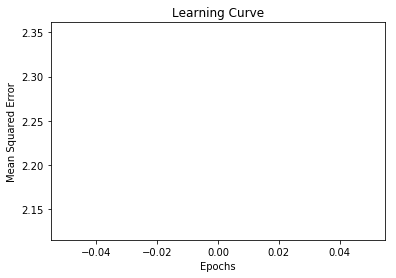

Epoch: 0	 cost: 2.238286256790161	 Etp: 0.0
Epoch: 1	 cost: 33312124.0	 Etp: 0.0
Epoch: 2	 cost: 3.5577976022876603e+31	 Etp: 0.0
Epoch: 3	 cost: nan	 Etp: 0.0
Epoch: 4	 cost: nan	 Etp: 0.0


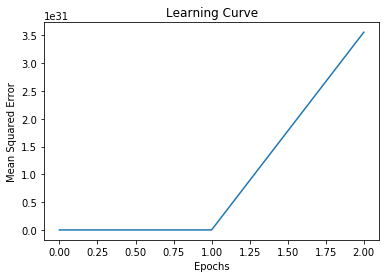

Epoch: 5	 cost: nan	 Etp: 0.0
Epoch: 6	 cost: nan	 Etp: 0.0
Epoch: 7	 cost: nan	 Etp: 0.0
Epoch: 8	 cost: nan	 Etp: 0.0
Epoch: 9	 cost: nan	 Etp: 0.0


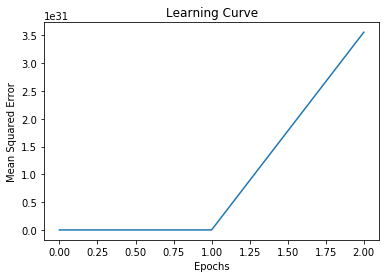

Epoch: 10	 cost: nan	 Etp: 0.0
Epoch: 11	 cost: nan	 Etp: 0.0
Epoch: 12	 cost: nan	 Etp: 0.0
Epoch: 13	 cost: nan	 Etp: 0.0
Epoch: 14	 cost: nan	 Etp: 0.0


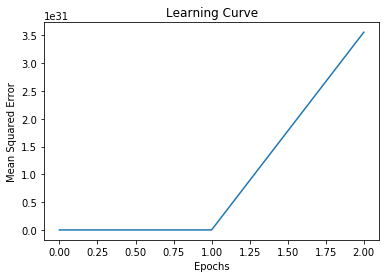

Epoch: 15	 cost: nan	 Etp: 0.0
Epoch: 16	 cost: nan	 Etp: 0.0
Epoch: 17	 cost: nan	 Etp: 0.0
Epoch: 18	 cost: nan	 Etp: 0.0
Epoch: 19	 cost: nan	 Etp: 0.0


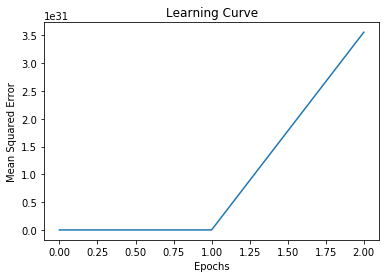

Epoch: 20	 cost: nan	 Etp: 0.0
Epoch: 21	 cost: nan	 Etp: 0.0
Epoch: 22	 cost: nan	 Etp: 0.0
Epoch: 23	 cost: nan	 Etp: 0.0
Epoch: 24	 cost: nan	 Etp: 0.0


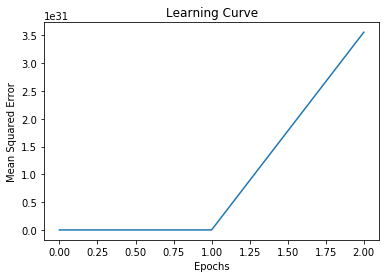

Epoch: 25	 cost: nan	 Etp: 0.0
Epoch: 26	 cost: nan	 Etp: 0.0
Epoch: 27	 cost: nan	 Etp: 0.0
Epoch: 28	 cost: nan	 Etp: 0.0
Epoch: 29	 cost: nan	 Etp: 0.0


In [11]:
cost_history = []
etp_history = []

model = Model()
# Perform your computation...
for i in range(epochs):

    phy_coord, inps = cvc.get_VC(randint(6, MAX_NODES))
    adj_matrix = cvc.get_adj(phy_coord)
    A_caret_matrix = cvc.normalize_adj(adj_matrix + np.eye(adj_matrix.shape[0]))

#     print('Calculated all the inputs')
    
    inputs = inps
    outputs = phy_coord
    curr_loss = loss(model(A_caret_matrix, inputs), outputs)
    curr_etp = get_etp(model(A_caret_matrix, inputs), phy_coord)
    
    train(model, inputs, A_caret_matrix, outputs, learning_rate=0.1)

    


    cost_history.append(curr_loss)
    etp_history.append(curr_etp)
    
    if not i%display_cost_period:
        plot_learning(cost_history)

    print('Epoch: {}\t cost: {}\t Etp: {}'.format(i, curr_loss, curr_etp))
        
        
        
            

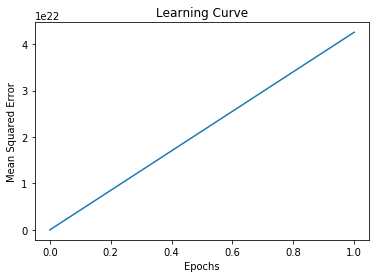

In [6]:
plot_learning(cost_history)